In [1]:
import numpy as np
np.float_ = np.float64
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from musdb import DB
from types import SimpleNamespace

from demucs import Demucs
from musdb18 import MUSDB18, display_sources

Found 150 tracks.


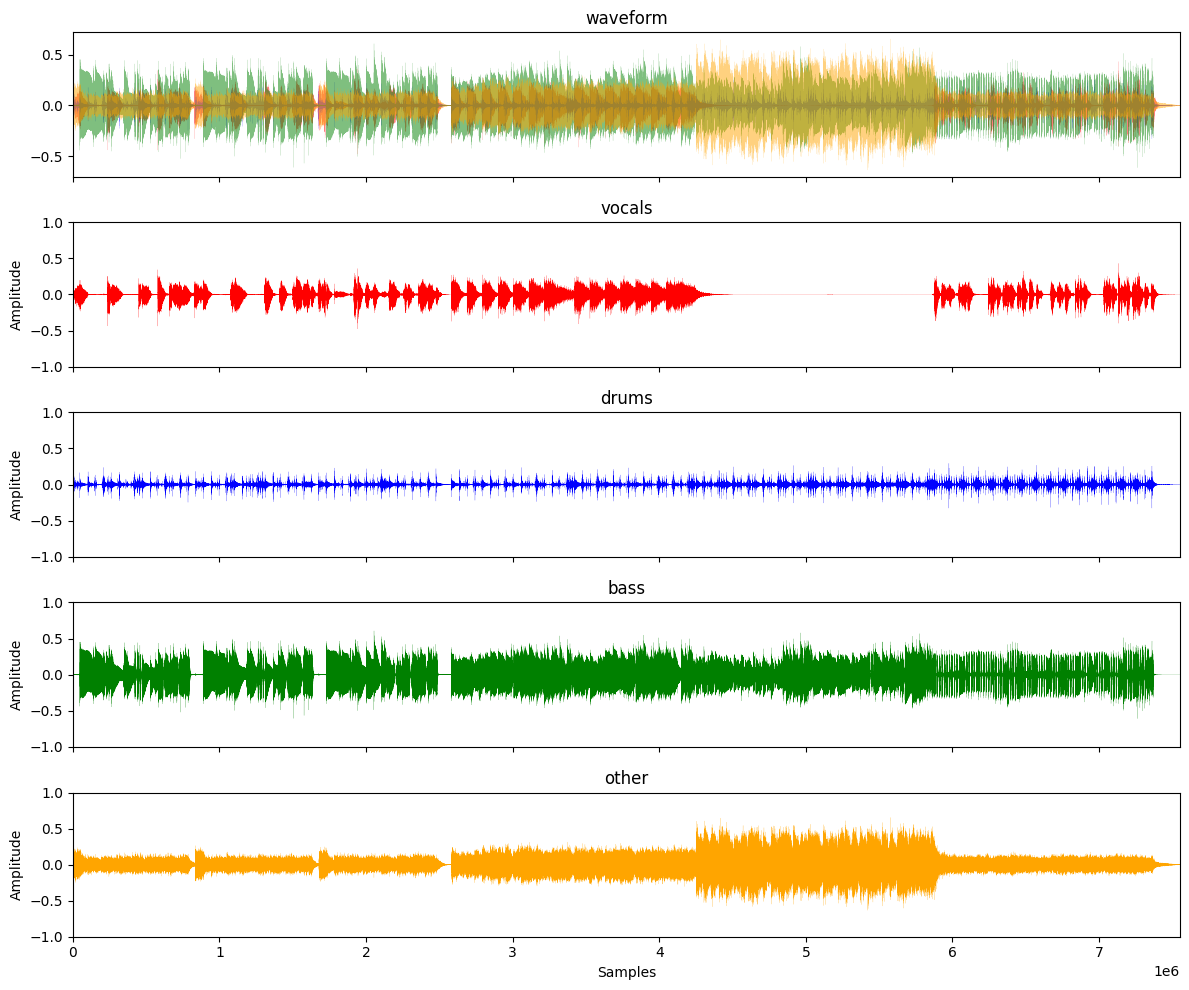

In [17]:
DATA_PATH = 'D:/GitHub/senior-thesis/musdb18/'

mus = DB(root=DATA_PATH, is_wav=False)  # test set has no ground truth
print(f"Found {len(mus)} tracks.")
track = mus[0]

display_sources(track)

In [7]:
model = Demucs(sources=["drums", "bass", "other", "vocals"])
model.load_state_dict(torch.load("D:\GitHub\senior-thesis\demucs_checkpoint.pth", map_location="cuda" if torch.cuda.is_available() else "cpu"))
model.to("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

sample_rate = 44100
audio = track.audio.T
audio_tensor = torch.tensor(audio, dtype=torch.float32).unsqueeze(0).cuda()

with torch.no_grad():
    est_sources = model(audio_tensor)

est_sources = est_sources.view(4,2,-1).cpu().numpy()

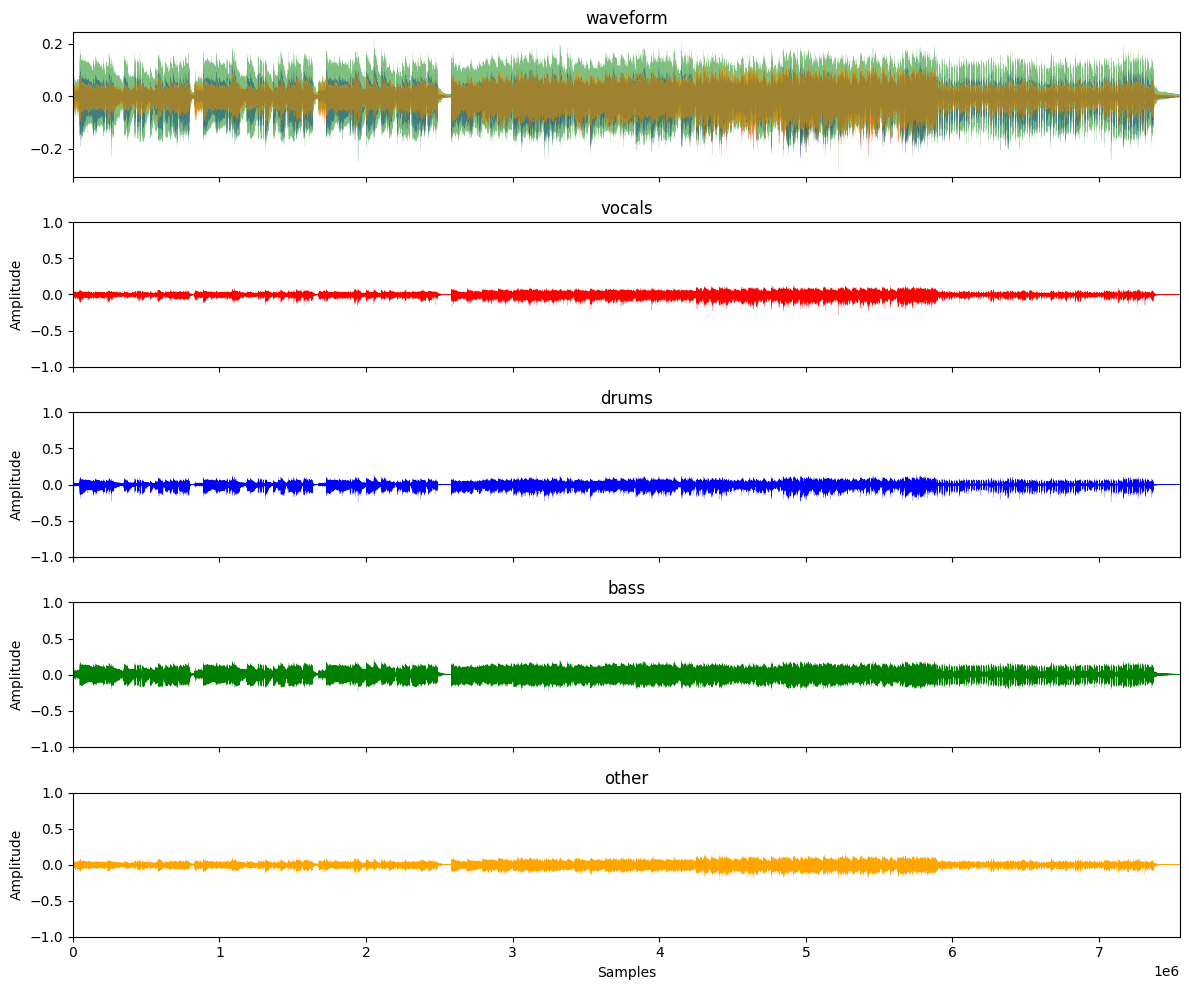

In [ ]:
source_names = ["vocals","drums","bass","other"]
track_est = track
track_est.targets = {}

for i,name in enumerate(source_names):
    audio = est_sources[i].T
    track_est.targets[name] = SimpleNamespace(audio=audio)

display_sources(track_est)

In [ ]:
from IPython.display import Audio, display

def display_audio(waveform, sample_rate=44100):
    return Audio(waveform, rate=sample_rate)

In [ ]:
for source_name in ["vocals", "drums", "bass", "other"]:
    display(Audio(track.targets[source_name].audio.T, rate=44100))

In [ ]:
for i in range(len(track.targets)-2):
    display(Audio(est_sources[i], rate=44100))